In [1]:
import functions as fu
import numpy as np
import matplotlib.pyplot as plt

import sparse as sp

## Normal Method

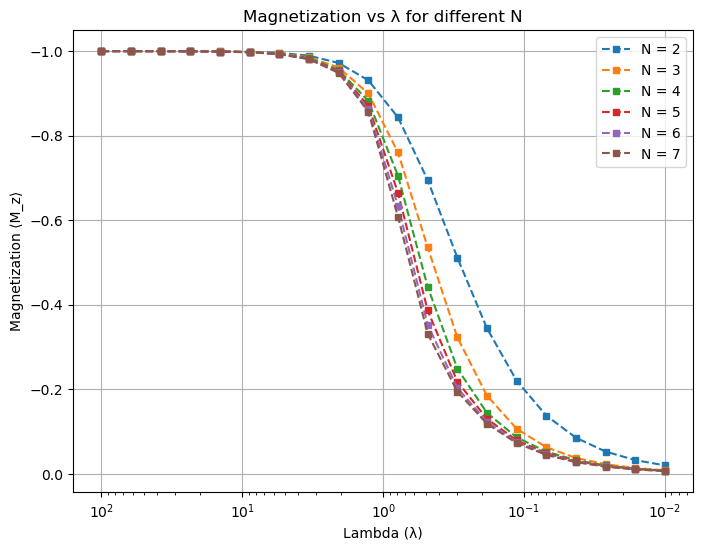

In [2]:
N_vals = [2,3,4,5,6,7]
# l_vals = np.linspace(0, 20, 100)
l_vals = np.logspace(2, -2, 20)


plt.figure(figsize=(8, 6))

for N in N_vals: 
    magnetizations = fu.compute_magnetization(N, l_vals)
    plt.plot(l_vals, magnetizations, "s--", markersize = 4, label=f'N = {N}')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('Lambda (λ)')
plt.ylabel('Magnetization ⟨M_z⟩')
plt.title('Magnetization vs λ for different N')
plt.legend()
plt.grid(True)
plt.show()

#### ZOOM IN THE CRITICAL POINT

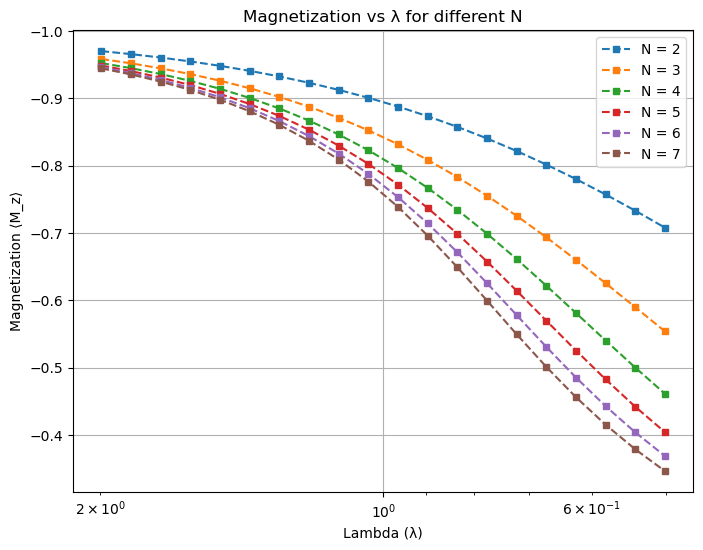

In [3]:
N_vals = [2,3,4,5,6,7]
# l_vals = np.linspace(0, 20, 100)
l_vals = np.logspace(0.3, -0.3, 20)


plt.figure(figsize=(8, 6))

for N in N_vals: 
    magnetizations = fu.compute_magnetization(N, l_vals)
    plt.plot(l_vals, magnetizations, "s--", markersize = 4, label=f'N = {N}')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('Lambda (λ)')
plt.ylabel('Magnetization ⟨M_z⟩')
plt.title('Magnetization vs λ for different N')
plt.legend()
plt.grid(True)
plt.show()

# Sparse Method

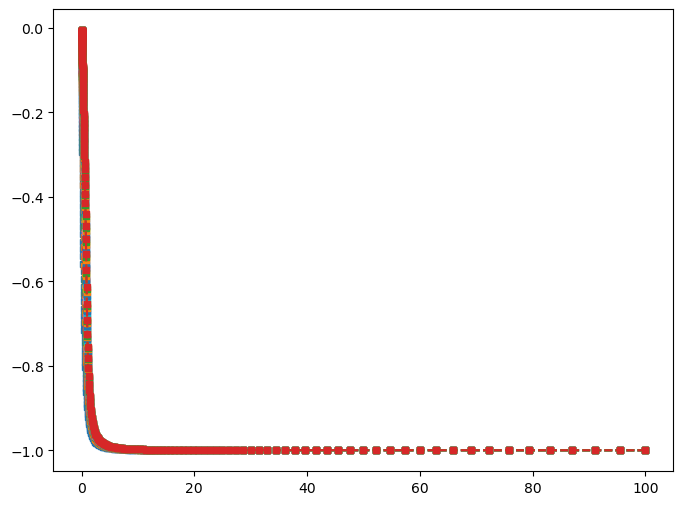

In [4]:
N_vals = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# l_vals = np.linspace(0, 20, 100)
l_vals = np.logspace(2, -2, 200)


plt.figure(figsize=(8, 6))

ensemble_magnetiz_total = []

for N in N_vals: 
    magnetizations = sp.compute_magnetization(N, l_vals)
    ensemble_magnetiz_total.append(magnetizations)
    plt.plot(l_vals, magnetizations, "s--", markersize = 4, label=f'N = {N}')


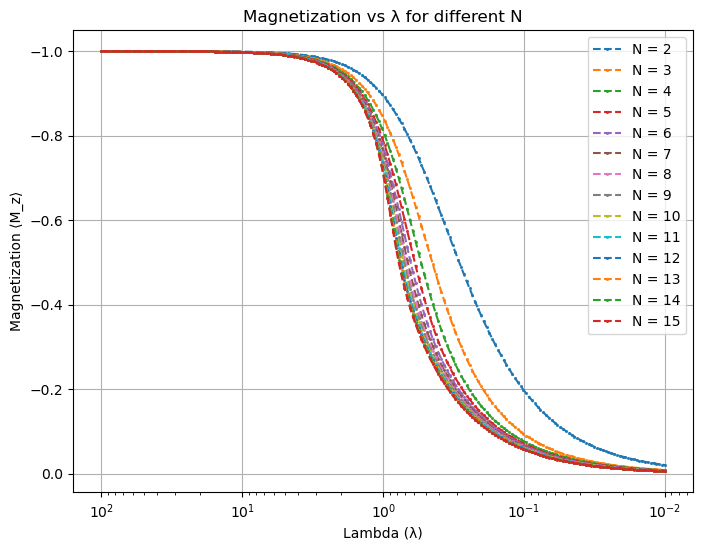

In [5]:
plt.figure(figsize=(8, 6))

for i, mag in enumerate(ensemble_magnetiz_total): 
    plt.plot(l_vals, mag, "s--", markersize = 1, label=f'N = {i+2}')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('Lambda (λ)')
plt.ylabel('Magnetization ⟨M_z⟩')
plt.title('Magnetization vs λ for different N')
plt.legend()
plt.grid(True)
plt.show()

#### ZOOM

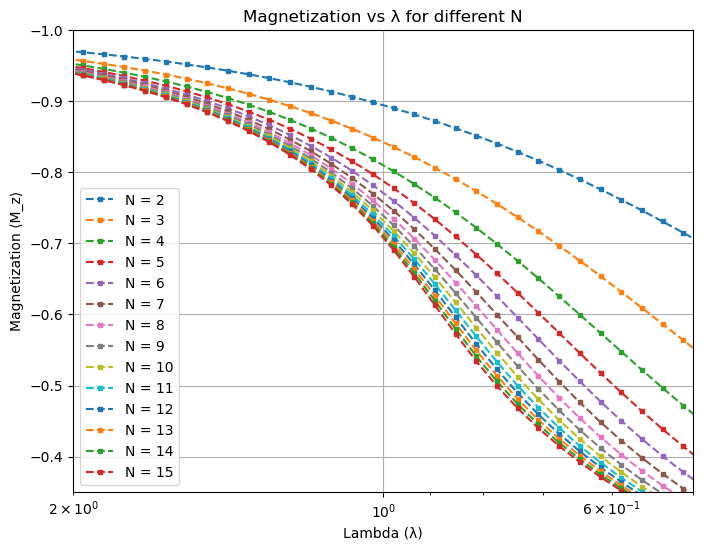

In [6]:
plt.figure(figsize=(8, 6))

for i, mag in enumerate(ensemble_magnetiz_total): 
    plt.plot(l_vals, mag, "s--", markersize = 3, label=f'N = {i+2}')

plt.xlim(0.5,2)
plt.ylim(-1, -0.35)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('Lambda (λ)')
plt.ylabel('Magnetization ⟨M_z⟩')
plt.title('Magnetization vs λ for different N')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
N_vals = [4,5,6,7,8,9,10,11,12,13,14,15]
# l_vals = np.linspace(0, 20, 100)
l_vals = np.logspace(0.3, -0.22, 200)

ensemble_magnetiz_close = []

for N in N_vals: 
    magnetizations = sp.compute_magnetization(N, l_vals)
    ensemble_magnetiz_close.append(magnetizations)


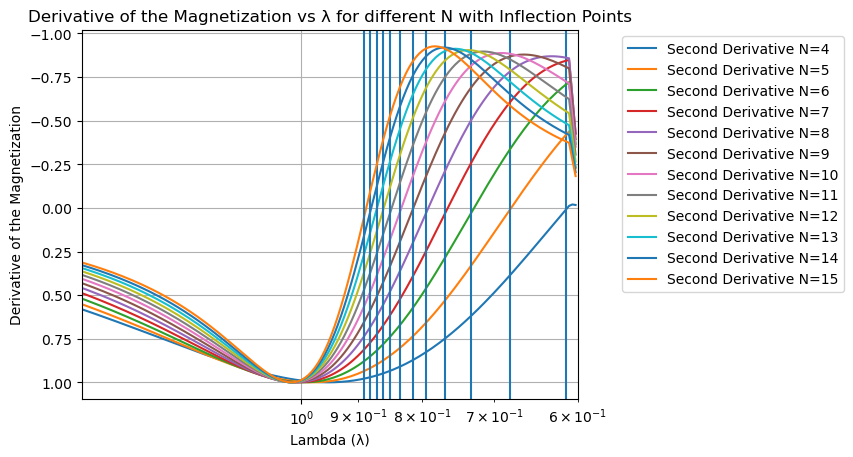

In [8]:
indices_points = []

for i, mag in enumerate(ensemble_magnetiz_close):

    second_derivative = np.gradient(np.gradient(mag))

    # infl_points_index = np.where(np.diff(np.sign(second_derivative)))[0]

    sign_changes = np.diff(np.sign(second_derivative))
    infl_points_index = np.where(sign_changes != 0)[0]


    # plt.plot(l_vals, mag, label='Smoothed Data')
    plt.plot(l_vals, second_derivative / np.max(second_derivative), label=f'Second Derivative N={i+4}')
    for i, infl in enumerate(infl_points_index, 1):
        indices_points.append(infl)
        plt.axvline(x=l_vals[infl])

plt.xscale('log')
plt.xlim(0.6,1.5)
plt.gca().invert_xaxis()  
plt.gca().invert_yaxis()
plt.xlabel("Lambda (λ)")
plt.ylabel("Derivative of the Magnetization")
plt.title("Derivative of the Magnetization vs λ for different N with Inflection Points")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.55, 1.0))
plt.show()

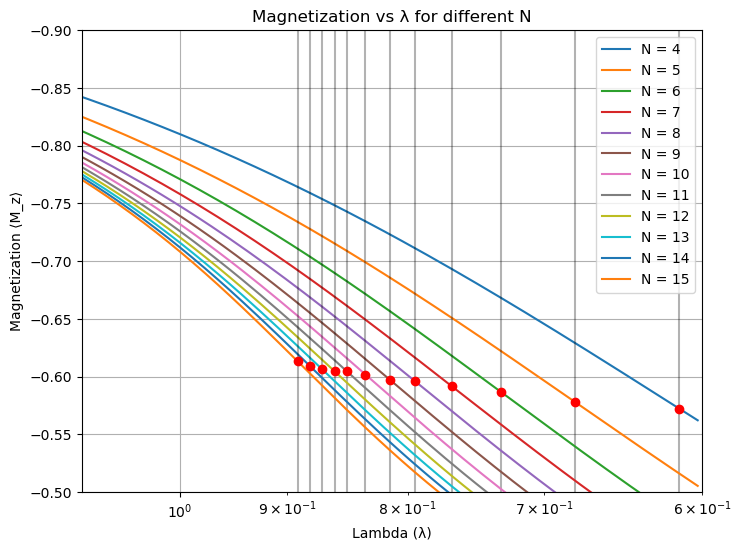

In [ ]:
plt.figure(figsize=(8, 6))

for i, mag in enumerate(ensemble_magnetiz_close): 
    plt.plot(l_vals, mag,,  label=f'N = {i+4}')
    plt.scatter(l_vals[indices_points[i]], mag[indices_points[i]], color='red', zorder=5)
    plt.axvline(x=l_vals[indices_points[i]], color = "black", alpha = 0.3)

plt.xlim(0.5,2)
plt.ylim(-1, -0.35)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xscale('log')  # Scala logaritmica sull'asse x
plt.xlabel('Lambda (λ)')
plt.ylabel('Magnetization ⟨M_z⟩')
plt.title('Magnetization vs λ for different N')
plt.legend()
plt.grid()
plt.show()

### Exact values of the critical point

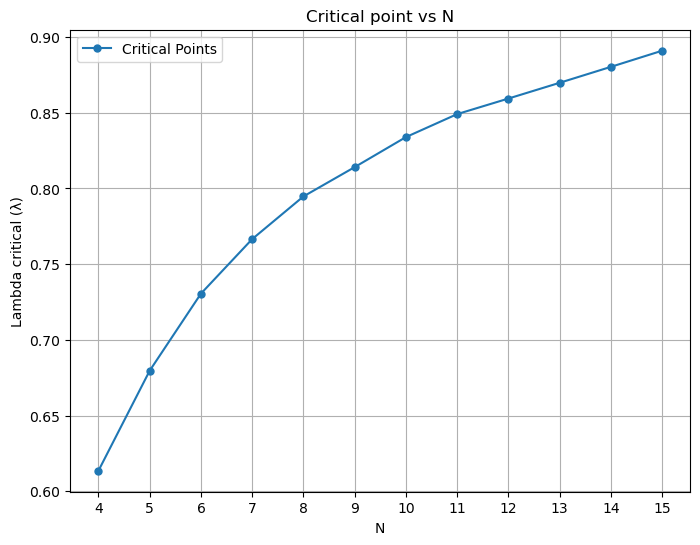

In [10]:
plt.figure(figsize=(8, 6))

plt.plot(N_vals, [l_vals[indices_points[i]] for i in range(len(N_vals))], 
         '-o', markersize=5, label='Critical Points')

plt.xlabel('N')
plt.ylabel('Lambda critical (λ)')
plt.title('Critical point vs N')
x_min, x_max = min(N_vals), max(N_vals)  # Trova il range dei tuoi dati N_vals
plt.xticks(np.arange(x_min, x_max + 1, 1))  # Ticks da x_min a x_max con passo di 1
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print([l_vals[indices_points[i]] for i in range(len(N_vals))])

[0.6135347926800416, 0.6796124191837966, 0.7304964175730098, 0.7665184505949523, 0.7946959596847979, 0.8140540969222221, 0.8338837823948374, 0.849072399435249, 0.8593515294897932, 0.869755101835417, 0.8802846230085422, 0.8909416177841806]


### Now I study the behaviour before and after the critical point

#### STILL TO DO

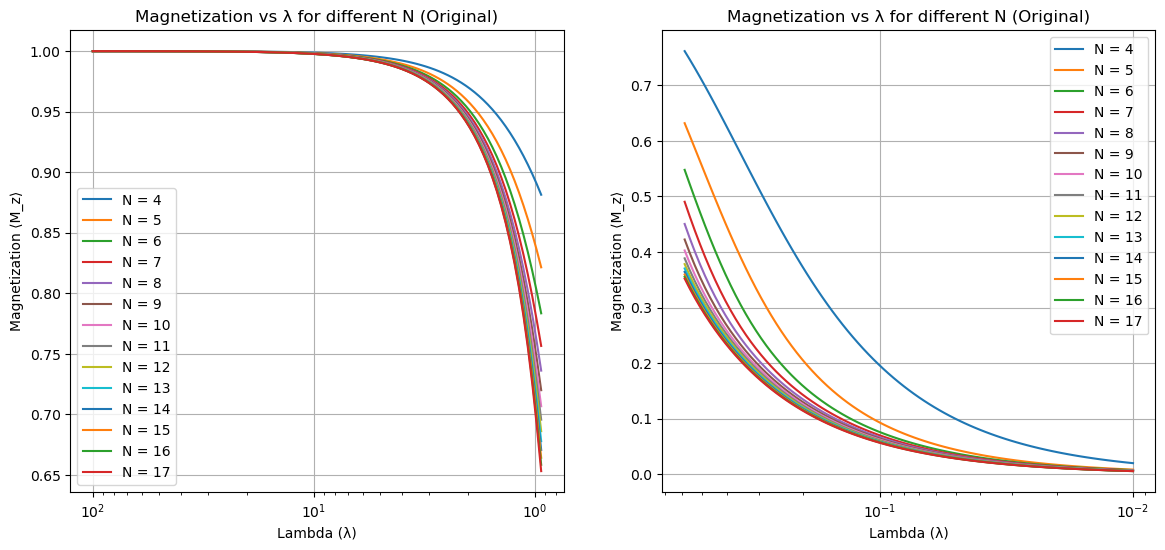

In [12]:
l_vals = np.logspace(2, -2, 200)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


for i, mag in enumerate(ensemble_magnetiz_total): 
    
    prova_y = [m*(-1) for m in mag]

    # print(len(prova_y))

    filtered_l_vals = [l for l in l_vals if l > 0.9]
    # print(len(filtered_l_vals))

    prova_y = [prova_y[j] for j, l in enumerate(l_vals) if l > 0.9]
    
    ax1.plot(filtered_l_vals, prova_y, label=f'N = {i+4}')


ax1.invert_xaxis()
# ax1.invert_yaxis()

ax1.set_xscale('log') 
# ax1.set_yscale('log') 

ax1.set_title('Magnetization vs λ for different N (Original)')
ax1.set_xlabel('Lambda (λ)')
ax1.set_ylabel('Magnetization ⟨M_z⟩')
ax1.legend()
ax1.grid(True)

# SECOND SUBPLOT
for i, mag in enumerate(ensemble_magnetiz_total): 
    
    prova_y = [m*(-1) for m in mag]

    # print(len(prova_y))

    filtered_l_vals = [l for l in l_vals if l < 0.6]
    # print(len(filtered_l_vals))

    prova_y = [prova_y[j] for j, l in enumerate(l_vals) if l < 0.6]
    
    ax2.plot(filtered_l_vals, prova_y, label=f'N = {i+4}')


ax2.invert_xaxis()
# ax2.invert_yaxis()

ax2.set_xscale('log') 
# ax2.set_yscale('log') 

ax2.set_title('Magnetization vs λ for different N (Original)')
ax2.set_xlabel('Lambda (λ)')
ax2.set_ylabel('Magnetization ⟨M_z⟩')
ax2.legend()
ax2.grid(True)


plt.show()